In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0  
x_test = x_test / 255.0

y_train_seg = (x_train.mean(axis=-1) > 0.5).astype(int)  
y_test_seg = (x_test.mean(axis=-1) > 0.5).astype(int)

# y_train_seg = y_train_seg[:, :, :, np.newaxis]  
# y_test_seg = y_test_seg[:, :, :, np.newaxis]  

In [5]:
print(x_train.shape)
print(y_train.shape)
print(y_train_seg.shape)


(50000, 32, 32, 3)
(50000, 1)
(50000, 32, 32)


In [6]:
x_train.mean(axis=-1)

array([[[0.24052288, 0.1751634 , 0.18431373, ..., 0.52026144,
         0.49542484, 0.49019608],
        [0.07320261, 0.        , 0.03398693, ..., 0.34771242,
         0.32941176, 0.34771242],
        [0.09150327, 0.03006536, 0.10980392, ..., 0.32941176,
         0.33202614, 0.29281046],
        ...,
        [0.61960784, 0.50718954, 0.50326797, ..., 0.4745098 ,
         0.12287582, 0.13986928],
        [0.54248366, 0.44183007, 0.47058824, ..., 0.55686275,
         0.25228758, 0.22222222],
        [0.57124183, 0.51111111, 0.53333333, ..., 0.70588235,
         0.46143791, 0.3751634 ]],

       [[0.67712418, 0.52156863, 0.39738562, ..., 0.33594771,
         0.32418301, 0.30065359],
        [0.6130719 , 0.59084967, 0.48104575, ..., 0.35686275,
         0.28627451, 0.26797386],
        [0.6       , 0.56732026, 0.44705882, ..., 0.29411765,
         0.25228758, 0.2496732 ],
        ...,
        [0.66405229, 0.61437908, 0.63267974, ..., 0.14640523,
         0.22352941, 0.34901961],
        [0.5

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input,Model

from tensorflow.keras.layers import MaxPooling2D,AvgPool2D,Dense,Flatten,UpSampling2D,Conv2D,concatenate

In [10]:
def Unet(input_shape=(32,32,3)):
    input = Input(input_shape)

    c1 = Conv2D(32,(3,3),activation='relu',padding='same')(input)
    p1 = MaxPooling2D((2,2),padding='same')(c1)

    c2 = Conv2D(64,(3,3),activation='relu',padding='same')(p1)
    p2 = MaxPooling2D((2,2),padding='same')(c2)

    c3 = Conv2D(128,(3,3),activation='relu',padding='same')(p2)

    u1 = UpSampling2D((2,2))(c3)
    m1 = concatenate([u1,c2])

    c4 = Conv2D(64,(3,3),activation='relu',padding='same')(m1)
    u2 = UpSampling2D((2,2))(c4)
    m2 = concatenate([u2,c1])

    c5 = Conv2D(32,(3,3),activation='relu',padding='same')(m2)

    outputs =Conv2D(1,(1,1),activation='sigmoid')(c5)

    return Model(input,outputs)

In [11]:
model = Unet()

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_seg,validation_data=(x_test,y_test_seg),batch_size=32,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9362 - loss: 0.1450 - val_accuracy: 0.9886 - val_loss: 0.0323
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9885 - loss: 0.0302 - val_accuracy: 0.9930 - val_loss: 0.0204
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9918 - loss: 0.0209 - val_accuracy: 0.9953 - val_loss: 0.0143
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9932 - loss: 0.0173 - val_accuracy: 0.9954 - val_loss: 0.0123
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9947 - loss: 0.0136 - val_accuracy: 0.9949 - val_loss: 0.0118


In [17]:
import matplotlib.pyplot as plt
pred = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


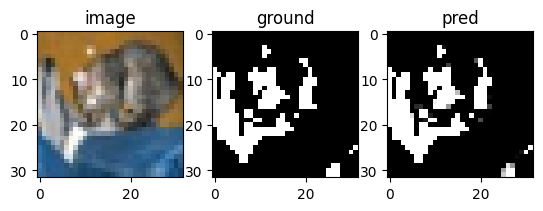

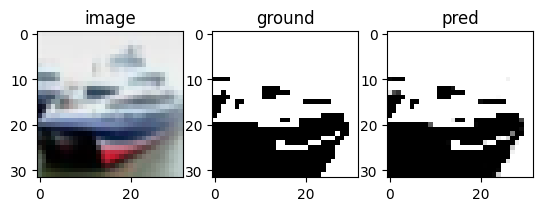

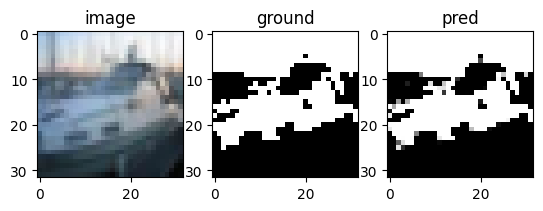

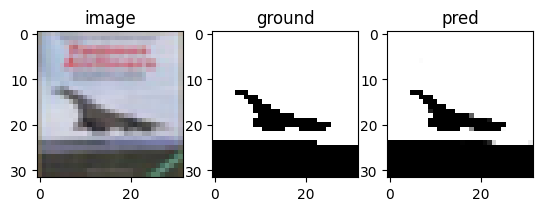

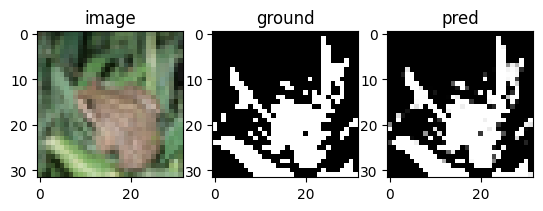

In [23]:
for i in range(5):
    plt.subplot(1,3,1)

    plt.title("image")
    plt.imshow(x_test[i])

    plt.subplot(1,3,2)
    plt.title("ground")
    plt.imshow(y_test_seg[i].squeeze(),cmap='gray')

    plt.subplot(1,3,3)
    plt.title('pred')
    plt.imshow(pred[i].squeeze(),cmap='gray')

    plt.show()